### E-Commerce Product Recall Prediction

**Table of Contents**
1. [Load Data Set](#A)
    * [Printing Head and Tail](#B)
    * [Basic Analysis](#MF)
    * [Data Cleaning](#T)
2. [Data Visualisation](#K)
    * [Heatmap](#R)
    * [Histogram](#F)
    * [Data Validation](#DV)

In [1]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

<a id = "A"></a>
### Load Data Set

In [2]:
dfecom = pd.read_csv("E-Commerce.csv")
print("File read successfully")

File read successfully


<a id = "B"></a>
### Printing Head and Tail

In [3]:
dfecom.head() #head

,Timestamp,Name,Age,Gender,Region/location,Type of products shop for most frequently online,Product Recalled After Purchase (Yes/No),Frequency of Checking Reviews,Key Review Factors,Trust in Online Reviews,Reported Defective/Unsafe Product,Want Earlier Safety Alerts?,Important Recall Information,Predicting Unsafe Products from Reviews,Trust in High-Risk Product Warnings,Unsafe Product Experience
0,2025/09/16 11:39:49 PM GMT+5:30,Abhikant Kumar,18–24,Male,Pari Chowk,Clothing & Apparel,Yes,Often,Star ratings,Moderately,Yes,Yes,Refund/return policy,Yes,Yes,none
1,2025/09/16 11:50:23 PM GMT+5:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025/09/16 11:50:44 PM GMT+5:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025/09/16 11:53:05 PM GMT+5:30,Aman kumar,18–24,Male,Greater Noida,Electronics,Maybe / Not Sure,Always,"Product safety concerns (e.g., fire hazard, al...",Slightly,Yes,Yes,"Reason for recall (safety issue, defect, hazard)",Yes,Yes,NaN
4,2025/09/16 11:56:32 PM GMT+5:30,Nikhil Kumar,18–24,Male,Greater Noida,Clothing & Apparel,Maybe / Not Sure,Always,Negative/complaint reviews,Completely,Yes,No,Refund/return policy,Yes,Yes,Some times wrong product to be delivered


<b>Description of Head</b>

1. The image shows the first few rows of a survey data set displayed using "df.ecom.head()".
2. It contains participant responses about online shopping behavior and experiences with unsafe or defective products.

In [4]:
dfecom.tail()

,Timestamp,Name,Age,Gender,Region/location,Type of products shop for most frequently online,Product Recalled After Purchase (Yes/No),Frequency of Checking Reviews,Key Review Factors,Trust in Online Reviews,Reported Defective/Unsafe Product,Want Earlier Safety Alerts?,Important Recall Information,Predicting Unsafe Products from Reviews,Trust in High-Risk Product Warnings,Unsafe Product Experience
78,2025/09/20 1:21:02 AM GMT+5:30,sushant,18–24,Male,pune,Clothing & Apparel,Yes,Always,Star ratings;Negative/complaint reviews;Produc...,Completely,No,Maybe,Refund/return policy,Yes,Yes,lots of experience
79,2025/09/20 1:23:05 AM GMT+5:30,Kashish,18–24,Male,mumbai,Clothing & Apparel,No,Always,Star ratings;Negative/complaint reviews;Produc...,Completely,No,Maybe,Official safety warnings,Maybe,Maybe,NaN
80,2025/09/25 12:38:11 PM GMT+5:30,Aniket,18–24,Male,Greater Noida,Clothing & Apparel,Yes,Often,"Star ratings;Product safety concerns (e.g., fi...",Moderately,Yes,Maybe,"Reason for recall (safety issue, defect, hazard)",Maybe,Yes,NaN
81,2025/10/03 7:40:49 PM GMT+5:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2025/10/03 7:42:22 PM GMT+5:30,Himanshu Sharma,18–24,Male,Hindu,Others,Yes,Sometimes,Star ratings,Not at all,Yes,Yes,Replacement availability,Yes,Yes,Yes


<b>Description of tail</b>

1. The image shows the last few rows of the e-commerce survey dataset using 'df.ecom.tail()'.
2.  It includes participant responses about trust in online reviews, product recalls, and experiences with unsafe or defective products.

In [5]:
#print Info
dfecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Timestamp                                         83 non-null     object
 1     Name                                            75 non-null     object
 2    Age                                              77 non-null     object
 3     Gender                                          79 non-null     object
 4   Region/location                                   76 non-null     object
 5   Type of products shop for most frequently online  79 non-null     object
 6   Product Recalled After Purchase (Yes/No)          78 non-null     object
 7    Frequency of Checking Reviews                    78 non-null     object
 8   Key Review Factors                                79 non-null     object
 9   Trust in Online Reviews           

<b>Description of info</b>

1. This output from "df.info()" shows a pandas DataFrame with 83 entries and 16 columns.
2.  All columns, which are primarily questions from a survey, are currently of the object Dtype and have varying counts of non-null values.
3.  The DataFrame consumes 10.5+ KB of memory.

## Finding Null Value Count

In [7]:
dfecom.isnull().sum()

Timestamp                                            0
  Name                                               8
 Age                                                 6
  Gender                                             4
Region/location                                      7
Type of products shop for most frequently online     4
Product Recalled After Purchase (Yes/No)             5
 Frequency of Checking Reviews                       5
Key Review Factors                                   4
Trust in Online Reviews                              5
Reported Defective/Unsafe Product                    5
Want Earlier Safety Alerts?                          5
Important Recall Information                         4
Predicting Unsafe Products from Reviews              5
Trust in High-Risk Product Warnings                  5
Unsafe Product Experience                           48
dtype: int64

<b>Description</b>

1. This output from "dfcom.isnull().sum()" shows the count of missing values for each column in the DataFrame.
2.  The 'Timestamp' column has 0 missing values, while the column for 'Any personal experience or story related to unsafe/defective online products?' has the highest number of missing values at 48.

<b><u>Counting Unique Values</b></u>

In [8]:
dfecom.nunique()

Timestamp                                           83
  Name                                              72
 Age                                                 4
  Gender                                             2
Region/location                                     53
Type of products shop for most frequently online     6
Product Recalled After Purchase (Yes/No)             3
 Frequency of Checking Reviews                       5
Key Review Factors                                  21
Trust in Online Reviews                              4
Reported Defective/Unsafe Product                    2
Want Earlier Safety Alerts?                          3
Important Recall Information                         4
Predicting Unsafe Products from Reviews              3
Trust in High-Risk Product Warnings                  3
Unsafe Product Experience                           24
dtype: int64

<b>Description</b>

1. This output from "dfcom.nunique()" shows the number of unique values for each column in the DataFrame.
2.  The 'Timestamp' column has 83 unique values, indicating they are all distinct, while categorical columns like 'What is your gender?' and 'Have you ever reported/flagged a defective or unsafe product on an e-commerce platform?' have the minimum of 2 unique values.

<a id = "MF"></a>
### Basic Analysis

In [9]:
dfecom.describe()

,Timestamp,Name,Age,Gender,Region/location,Type of products shop for most frequently online,Product Recalled After Purchase (Yes/No),Frequency of Checking Reviews,Key Review Factors,Trust in Online Reviews,Reported Defective/Unsafe Product,Want Earlier Safety Alerts?,Important Recall Information,Predicting Unsafe Products from Reviews,Trust in High-Risk Product Warnings,Unsafe Product Experience
count,83,75,77,79,76,79,78,78,79,78,78,78,79,78,78,35
unique,83,72,4,2,53,6,3,5,21,4,2,3,4,3,3,24
top,2025/09/16 11:39:49 PM GMT+5:30,Aman kumar,18–24,Male,Greater Noida,Clothing & Apparel,Yes,Always,Star ratings,Moderately,Yes,Yes,Refund/return policy,Yes,Yes,No
freq,1,2,70,63,6,33,39,57,23,44,64,60,43,58,51,11


<b>Description</b>

1. This output from 'dfcom.describe(include='object')' provides a summary of the non-numeric columns in the DataFrame.
2. Key statistics include the total count of non-null entries, the number of unique values (unique), the most frequent value (top), and its frequency (freq) for each column.

<a id = "T"></a>
## Data Cleaning

In [10]:
# Clean up spaces in all column names
dfecom.columns = dfecom.columns.str.strip()

# Check cleaned names
print(dfecom.columns)


Index(['Timestamp', 'Name', 'Age', 'Gender', 'Region/location',
       'Type of products shop for most frequently online',
       'Product Recalled After Purchase (Yes/No)',
       'Frequency of Checking Reviews', 'Key Review Factors',
       'Trust in Online Reviews', 'Reported Defective/Unsafe Product',
       'Want Earlier Safety Alerts?', 'Important Recall Information',
       'Predicting Unsafe Products from Reviews',
       'Trust in High-Risk Product Warnings', 'Unsafe Product Experience'],
      dtype='object')


In [11]:
le = LabelEncoder()

# Encode all text columns
for col in dfecom.columns:
    if dfecom[col].dtype == 'object':
        dfecom[col] = le.fit_transform(dfecom[col].astype(str))


<a id = "K"></a>
## Data Visualization

<b><u>Count Plot</b></u>

<b>Work With the Cleaned Column</b>

Count of Respondents by Gender Graph

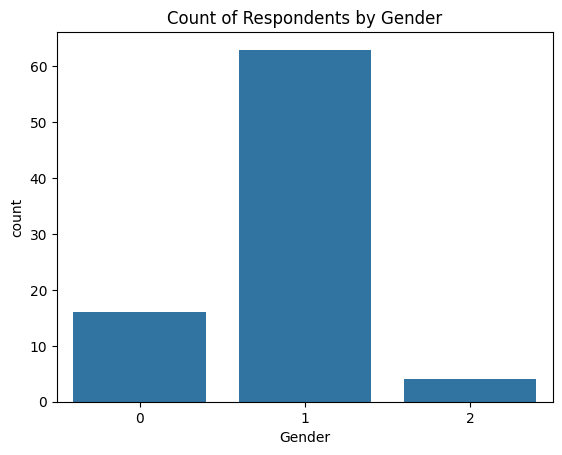

In [12]:
sns.countplot(x='Gender', data=dfecom)
plt.title('Count of Respondents by Gender')
plt.show()


Most Common Age Group

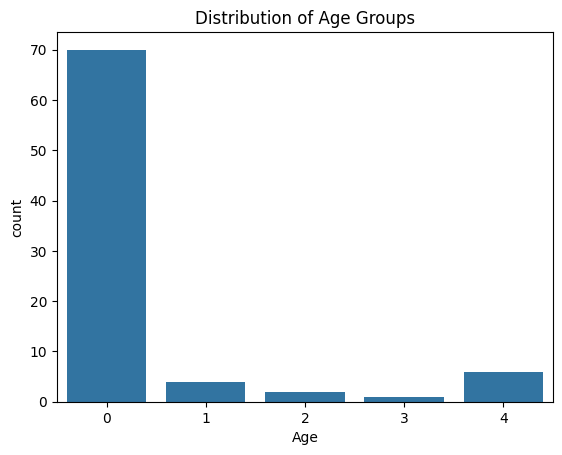

In [13]:
sns.countplot(x='Age', data=dfecom)
plt.title('Distribution of Age Groups')
plt.show()


Most Frequent Product Type

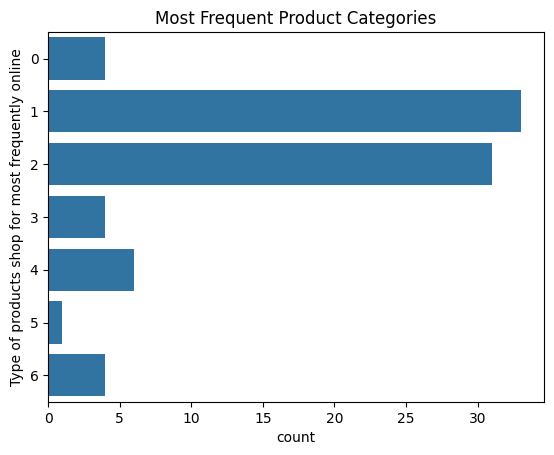

In [14]:
sns.countplot(y='Type of products shop for most frequently online', data=dfecom)
plt.title('Most Frequent Product Categories')
plt.show()


How Often People Check Reviews

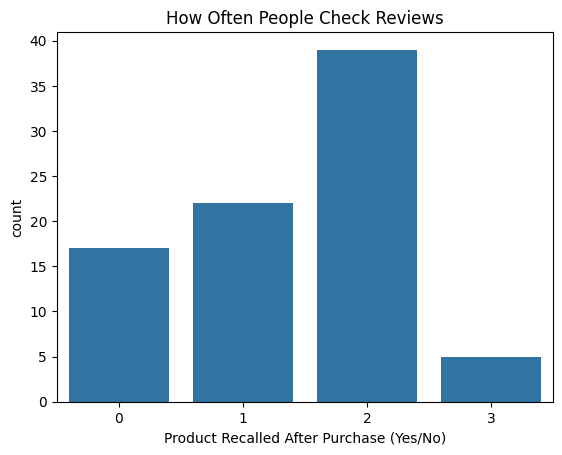

In [16]:
sns.countplot(x='Product Recalled After Purchase (Yes/No)', data=dfecom)
plt.title('How Often People Check Reviews')
plt.show()


Trust in Reviews

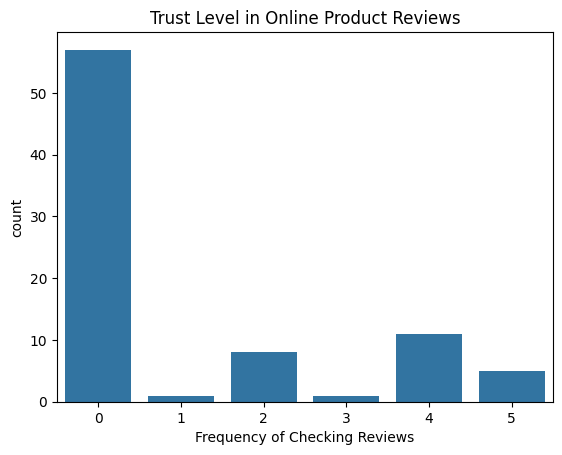

In [18]:
sns.countplot(x='Frequency of Checking Reviews', data=dfecom)
plt.title('Trust Level in Online Product Reviews')
plt.show()


Want Early Alerts About Unsafe Products

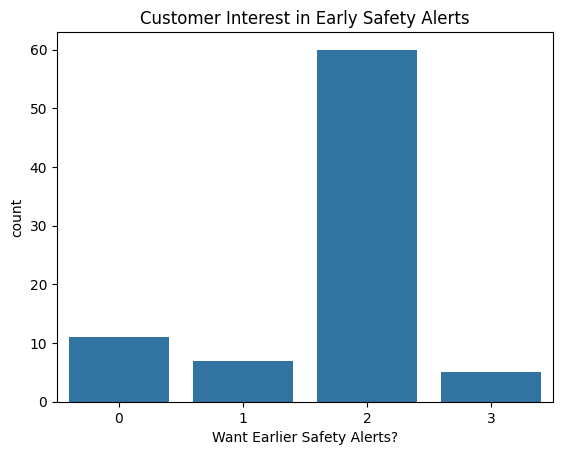

In [21]:
sns.countplot(x='Want Earlier Safety Alerts?', data=dfecom)
plt.title('Customer Interest in Early Safety Alerts')
plt.show()


<a id = "R"></a>
#### Heat Map
Heat map is useful if you want to see any correlations between attributes. We'll see correlations between math, reading, and writing score.

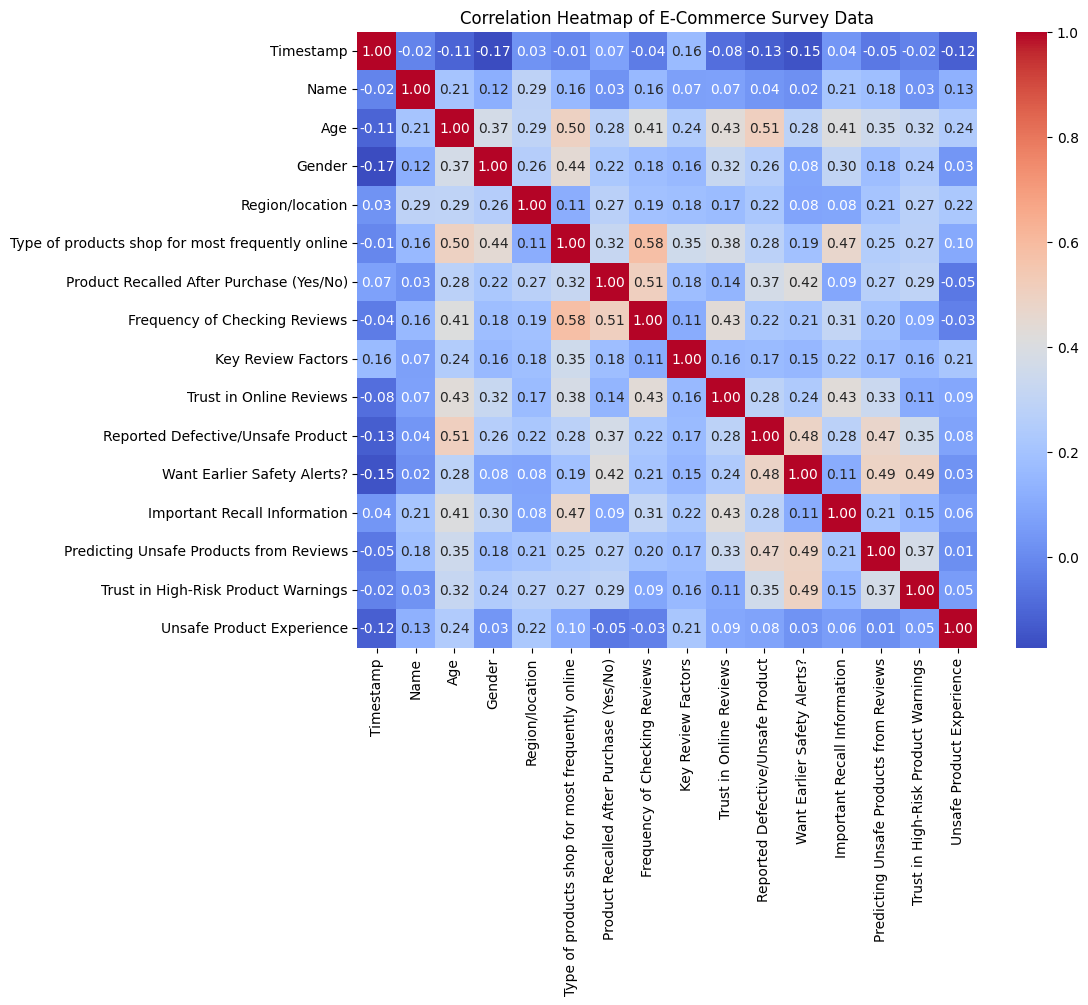

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(dfecom.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of E-Commerce Survey Data")
plt.show()


<u><b>Description of heatmap</u></b>

1. The heatmap shows how different survey answers are related to each other.
2. Darker or brighter colors mean a stronger relationship between two factors.
3. It helps identify which behaviors or opinions are most connected in the E-Commerce data.
4. This visualization makes it easy to spot patterns, such as how trust in reviews relates to buying habits or product preferences.

<a id = "F"></a>
### Histogram

Distribution of Age Groups graph

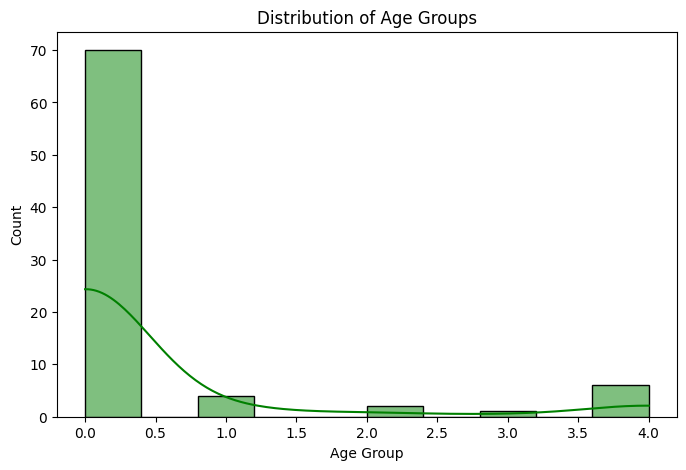

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(dfecom['Age'], color='green', bins=10, kde=True)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

<a id = "DV"></a>
### Data Validation

In [25]:
# Step 1: Encode text columns (convert to numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfecom.columns:
    if dfecom[col].dtype == 'object':
        dfecom[col] = le.fit_transform(dfecom[col].astype(str))

In [28]:
# Step 2: Choose features (X) and target (y)
# Example: Predict "How much do you trust online product reviews?"
X = dfecom.drop('Trust in Online Reviews', axis=1)
y = dfecom['Trust in Online Reviews']

In [29]:
# Step 3: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Step 4: (Optional) Standardize numeric values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b><u>Training Logistic Regression Model</b></u>

In [31]:
# Step 5: Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
# Step 6: Validate (Test the model)
y_pred = model.predict(X_test)

In [34]:
# Step 7: Print validation results
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Model Accuracy: 0.47058823529411764

Confusion Matrix:
 [[0 5 1]
 [1 8 1]
 [0 1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      0.80      0.67        10
           2       0.00      0.00      0.00         1

    accuracy                           0.47        17
   macro avg       0.19      0.27      0.22        17
weighted avg       0.34      0.47      0.39        17

